In [11]:
### import libraries ###
from astropy.io import fits
from astropy import table
import os
import pandas as pd
from func_stat import statResid
import matplotlib.pyplot as plt

In [2]:
### Working directories and file names ###
dirCatalogs=r'/mnt/Data/Work/Sources/COSMOS/Catalogs/DuplicateCheck'
os.chdir(dirCatalogs)

testDuplInFileName=r"Test_MSpecOrig_duplicatesIn.csv"

In [3]:
test=pd.read_csv(testDuplInFileName)

(array([5.210e+02, 1.728e+03, 1.743e+03, 2.059e+03, 1.538e+03, 8.040e+02,
        2.340e+02, 1.200e+01, 7.000e+00, 2.000e+00]),
 array([0.0027  , 0.185484, 0.368268, 0.551052, 0.733836, 0.91662 ,
        1.099404, 1.282188, 1.464972, 1.647756, 1.83054 ]),
 <a list of 10 Patch objects>)

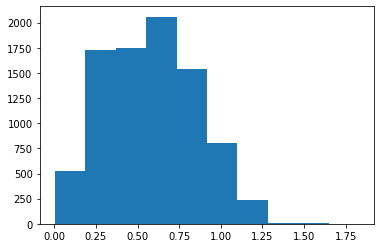

In [17]:
test=test[(test['z_spec']>0) & (test['z_spec']<8)]
plt.hist(test['z_spec'])

In [18]:
# Identifying and counting objects with multiple measurements
test_uniq=test['Seq'].value_counts()

In [19]:
# Creating a column where we calculate max difference between the measurements for every object
test['SpecScatter']=0

In [20]:
# INTify Seq column (aka ID)
test['Seq']=test['Seq'].apply(int)

In [21]:
# Calculating max difference between the measurements for every object 
for i in test_uniq[test_uniq>1].index:
    diff=test.loc[test['Seq']==i,'z_spec'].max()-test.loc[test['Seq']==i,'z_spec'].min()
    test.loc[test['Seq']==i,'SpecScatter']=diff

In [22]:
# Counting how many objects are with big differences within their groups
print(test[test['SpecScatter']>=0.1]['Seq'].nunique(),'objects with SpecScatter>0.1 out of',test['Seq'].nunique())

277 objects with SpecScatter>0.1 out of 5967


In [23]:
test.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Ksmagap3', 'Ymagap3', 'Hmagap3',
       'Jmagap3', 'Bmagap3', 'Vmagap3', 'ipmagap3', 'rmagap3', 'umagap3',
       'zppmagap3', 'IB574ap3', 'photoZ_SED', 'specZ', 'Instr_1', 'Q_f_1',
       'sc_Ksmagap3', 'sc_Ymagap3', 'sc_Hmagap3', 'sc_Jmagap3', 'sc_Bmagap3',
       'sc_Vmagap3', 'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3',
       'photoZ_ML', 'resid_ML', 'resid_SED', 'residML_SED', 'w_sc_Ksmagap3',
       'w_sc_Ymagap3', 'w_sc_Hmagap3', 'w_sc_Jmagap3', 'w_sc_Bmagap3',
       'w_sc_Vmagap3', 'w_sc_ipmagap3', 'w_sc_rmagap3', 'w_sc_umagap3',
       'w_sc_zppmagap3', 'quantErr', 'cellID_TrainSOM', 'cellID_RunSOM',
       'cellID_RunBigSOM', 'specZ_outlCoeff', 'photoZ_ML_outlCoeff',
       'photoZ_SED_outlCoeff', 'quantErr_outlCoeff', 'trainMapOccupation',
       'L_ID', 'Instr_2', 'ORI_RA', 'ORI_Dec', 'ORI_ID', 'z_spec', 'Q_f_2',
       'RA_corr', 'Dec_corr', 'ID', 'ALPHA_J2000', 'DELTA_J2000', 'GroupID_2',
       'GroupSize_2', 'Contact'

(array([4955.,  680.,  435.,  343.,  256.,  188.,  164.,   83.,   86.,
          68.]),
 array([0.        , 0.00199218, 0.00398436, 0.00597654, 0.00796872,
        0.0099609 , 0.01195308, 0.01394526, 0.01593744, 0.01792962,
        0.0199218 ]),
 <a list of 10 Patch objects>)

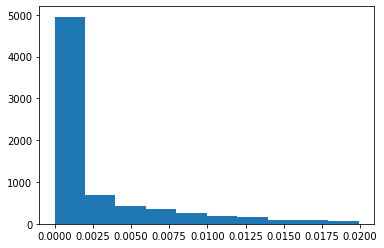

In [32]:
plt.hist(test[test['SpecScatter']<0.02]['SpecScatter'])

In [40]:
print('Big scatter ',len(test[test['SpecScatter']>=0.02]['Seq'].unique()))
print('Small scatter ',len(test[test['SpecScatter']<0.02]['Seq'].unique()))

Big scatter  606
Small scatter  5361


In [36]:
# Calculating stats for residuals for objects with big scatter
print('Stats for resids for ML photo-z for objects with big scatter')
print(statResid(test[test['SpecScatter']>=0.1].drop_duplicates(subset='Seq'),'resid_ML'))
print('Stats for resids for SED photo-z for objects with big scatter')
print(statResid(test[test['SpecScatter']>=0.1].drop_duplicates(subset='Seq'),'resid_SED'))

Stats for resids for ML photo-z for objects with big scatter
{'Num objects': 277, 'Std': 0.119, 'NMAD': 0.03, 'Mean': -0.0091, '% outl_15': 11.19}
Stats for resids for SED photo-z for objects with big scatter
{'Num objects': 277, 'Std': 0.152, 'NMAD': 0.021, 'Mean': -0.0207, '% outl_15': 10.83}


In [37]:
# Calculating stats for residuals for objects with small scatte
print('Stats for resids for ML photo-z for objects with small scatter')
print(statResid(test[(test['SpecScatter']>0) & (test['SpecScatter']<0.1)].drop_duplicates(subset='Seq'),'resid_ML'))
print('Stats for resids for SED photo-z for objects with small scatter')
print(statResid(test[(test['SpecScatter']>0) & (test['SpecScatter']<0.1)].drop_duplicates(subset='Seq'),'resid_SED'))

Stats for resids for ML photo-z for objects with small scatter
{'Num objects': 1923, 'Std': 0.024, 'NMAD': 0.016, 'Mean': 0.0017, '% outl_15': 0.16}
Stats for resids for SED photo-z for objects with small scatter
{'Num objects': 1923, 'Std': 0.056, 'NMAD': 0.009, 'Mean': 0.0016, '% outl_15': 0.21}


In [38]:
# Calculating stats for residuals for objects with only one measurement
print('Stats for resids for ML photo-z for objects with only one measurement')
print(statResid(test[test['SpecScatter']==0].drop_duplicates(subset='Seq'),'resid_ML'))
print('Stats for resids for SED photo-z for objects with only one measurement')
print(statResid(test[test['SpecScatter']==0].drop_duplicates(subset='Seq'),'resid_SED'))

Stats for resids for ML photo-z for objects with only one measurement
{'Num objects': 3767, 'Std': 0.048, 'NMAD': 0.02, 'Mean': -0.0038, '% outl_15': 1.7}
Stats for resids for SED photo-z for objects with only one measurement
{'Num objects': 3767, 'Std': 0.104, 'NMAD': 0.012, 'Mean': -0.0058, '% outl_15': 2.63}


In [52]:
# Calculating mean specz_outlCoeff for objects with big scatter
print('Median, min and max specz_outlCoeff for objects with big scatter')
t=test[test['SpecScatter']>=0.1].drop_duplicates(subset='Seq')['specZ_outlCoeff'].astype(float).abs()
print(list(map(lambda x:round(x,3),[t.median(),t.min(),t.max()])))

Median, min and max specz_outlCoeff for objects with big scatter
[0.784, 0.003, 17.445]


In [54]:
# Calculating mean specz_outlCoeff for objects with small scatter
print('Median, min and max specz_outlCoeff for objects with small scatter')
t=test[(test['SpecScatter']>0) & (test['SpecScatter']<0.1)].drop_duplicates(subset='Seq')['specZ_outlCoeff'].astype(float).abs()
print(list(map(lambda x:round(x,3),[t.median(),t.min(),t.max()])))

Median, min and max specz_outlCoeff for objects with small scatter
[0.563, 0.0, 9.802]


In [53]:
# Calculating mean specz_outlCoeff for objects with only one measurement
print('Median, min and max specz_outlCoeff for objects with zero scatter')
t=test[test['SpecScatter']==0].drop_duplicates(subset='Seq')['specZ_outlCoeff'].astype(float).abs()
print(list(map(lambda x:round(x,3),[t.median(),t.min(),t.max()])))

Median, min and max specz_outlCoeff for objects with zero scatter
[0.578, 0.0, inf]


In [101]:
# SED outliers with small scatter of spec-z
t=test.drop_duplicates(subset='Seq')[test['resid_SED'].abs()>0.15]
print('N SED outliers_0.15: ',len(t))
t=t[(t['SpecScatter']>0) & (t['SpecScatter']<0.15)]
print('N SED outliers_0.15 with small scatter of spec_z: ',len(t))
print('Median scatter of spec-z: ',round(t['SpecScatter'].median(),3))
#t[['specZ_outlCoeff','resid_SED','resid_ML','residML_SED','SpecScatter','specZ']]

N SED outliers_0.15:  133
N SED outliers_0.15 with small scatter of spec_z:  4
Median scatter of spec-z:  0.002


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [103]:
# SED outliers with big scatter of spec-z
t=test.drop_duplicates(subset='Seq')[test['resid_SED'].abs()>0.15]
print('N SED outliers_0.15: ',len(t))
t=t[t['SpecScatter']>=0.15]
print('N SED outliers_0.15 with big scatter of spec_z: ',len(t))
print('Median scatter of spec-z: ',round(t['SpecScatter'].median(),3))
#t[['specZ_outlCoeff','resid_SED','resid_ML','SpecScatter']]

N SED outliers_0.15:  133
N SED outliers_0.15 with big scatter of spec_z:  30
Median scatter of spec-z:  0.437


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [104]:
t=test.drop_duplicates(subset='Seq')[test['resid_ML'].abs()>0.15]
print('N ML outliers_0.15: ',len(t))
t=t[(t['SpecScatter']>0) & (t['SpecScatter']<0.15)]
print('N ML outliers_0.15 with small scatter of spec_z: ',len(t))
print('Median scatter of spec-z: ',round(t['SpecScatter'].median(),3))
#t[['specZ_outlCoeff','resid_SED','resid_ML','SpecScatter']]

N ML outliers_0.15:  98
N ML outliers_0.15 with small scatter of spec_z:  3
Median scatter of spec-z:  0.001


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [106]:
t=test.drop_duplicates(subset='Seq')[test['resid_ML'].abs()>0.15]
print('N ML outliers_0.15: ',len(t))
t=t[t['SpecScatter']>0.15]
print('N ML outliers_0.15 with big scatter of spec_z: ',len(t))
print('Median scatter of spec-z: ',round(t['SpecScatter'].median(),3))
#t[['specZ_outlCoeff','resid_SED','resid_ML','SpecScatter']]

N ML outliers_0.15:  98
N ML outliers_0.15 with big scatter of spec_z:  31
Median scatter of spec-z:  0.365


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [113]:
t=test.drop_duplicates(subset='Seq')[test['resid_SED'].abs()<=0.15]
print('N SED non-outliers: ',len(t))
t=t[t['SpecScatter']>0.15]
print('N SED non-outliers with big scatter of spec_z: ',len(t))
print('Median scatter of spec-z: ',round(t['SpecScatter'].median(),3))
#t[['specZ_outlCoeff','resid_SED','resid_ML','SpecScatter']]

N SED non-outliers:  5834
N SED non-outliers with big scatter of spec_z:  146
Median scatter of spec-z:  0.236


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [114]:
t=test.drop_duplicates(subset='Seq')[test['resid_SED'].abs()<=0.15]
print('N SED non-outliers: ',len(t))
t=t[(t['SpecScatter']>0) & (t['SpecScatter']<=0.15)]
print('N SED non-outliers with small scatter of spec_z: ',len(t))
print('Median scatter of spec-z: ',round(t['SpecScatter'].median(),3))
#t[['specZ_outlCoeff','resid_SED','resid_ML','SpecScatter']]

N SED non-outliers:  5834
N SED non-outliers with small scatter of spec_z:  2020
Median scatter of spec-z:  0.005


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [117]:
t=test.drop_duplicates(subset='Seq')[test['resid_ML'].abs()<=0.15]
print('N ML non-outliers: ',len(t))
t=t[t['SpecScatter']>0.15]
print('N ML non-outliers with big scatter of spec_z: ',len(t))
print('Median scatter of spec-z: ',round(t['SpecScatter'].median(),3))
#t[['specZ_outlCoeff','resid_SED','resid_ML','SpecScatter']]

N ML non-outliers:  5869
N ML non-outliers with big scatter of spec_z:  145
Median scatter of spec-z:  0.238


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [115]:
t=test.drop_duplicates(subset='Seq')[test['resid_ML'].abs()<=0.15]
print('N ML non-outliers: ',len(t))
t=t[(t['SpecScatter']>0) & (t['SpecScatter']<=0.15)]
print('N ML non-outliers with small scatter of spec_z: ',len(t))
print('Median scatter of spec-z: ',round(t['SpecScatter'].median(),3))
#t[['specZ_outlCoeff','resid_SED','resid_ML','SpecScatter']]

N ML non-outliers:  5869
N ML non-outliers with small scatter of spec_z:  2021
Median scatter of spec-z:  0.005


/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [127]:
t=test.drop_duplicates(subset='Seq')[test['resid_ML'].abs()>0.15]
t=t[t['SpecScatter']>0.15]
ML_outl=t['Seq']
t=test.drop_duplicates(subset='Seq')[test['resid_SED'].abs()>0.15]
t=t[t['SpecScatter']>0.15]
SED_outl=t['Seq']
set(ML_outl)-set(SED_outl)

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


{470262, 644337, 982888}

In [128]:
set(SED_outl)-set(ML_outl)

{826511, 831553}

In [130]:
t=test.drop_duplicates(subset='Seq')
t=t[t['SpecScatter']>0.15]
len(t)/len(test)

0.020351526364477335